<a href="https://colab.research.google.com/github/rakhmadidev/capstoneProject3/blob/main/capstoneModule3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ardhon Rakhmadi - JCDSVL 07 - 
Travel Insurance

##Business Problem Understanding
###Latar Belakang
Perusahaan asuransi travel ingin menerapkan sistem seleksi cerdas berbasis machine learning. Sistem seleksi cerdas tersebut akan menilai apakah customer  mendapatkan klaim asuransi atau tidak dengan melihat profil yang diekstrak dari data-data perjalanan customer.  

Target :
*   0 -> Customer yang tidak mendapatkan klaim asuransi
*   1 -> Customer yang mendapatkan klaim asuransi

###Problem Statement :
Sebenarnya perusahaan sudah membuat suatu model untuk menerapkan sistem seleksi cerdas yang akurasinya sangat tinggi untuk menyeleksi customer yang tidak untuk mendapatkan klaim asuransi, namun model menjadi sangat tidak akurat untuk menyeleksi customer yang mendapatkan asuransi. Sehingga banyak customer yang seharusnya mendapatkan klaim asuransi merasa dirugikan dan tidak puas. 

###Goals :
Dari permasalahan tersebut perusahaan ingin agar model yang digunakan untuk seleksi otomatis dievaluasi dan diperbaiki sehingga bisa menyeleksi customer yang mendapatkan klaim asuransi. Diharapkan dengan evaluasi dan perbaikan model ini jumlah customer yang merasa dirugikan dan tidak puas menjadi berkurang.

###Metric Evaluation


*   Type 1 Error : False Positive
Konsekuensi : Customer yang seharusnya tidak mendapatkan klaim asuransi bisa mendapatkan klaim asuransi sehingga klaim asuransi yang tidak tepat sasaran bisa bertambah banyak jumlahnya 
*   Type 2 Error : False Negative
Konsekuensi : Customer yang seharusnya mendapatkan klaim asuransi tidak mendapatkan klaim asuransi sehingga customer merasa dirugikan. Hal ini bisa membuat jelek reputasi perusahaan asuransi dan berpotensi membuat customer tidak mau untuk mengikuti asuransi lagi.


Dari konsekuensinya dapat dilihat bahwa model diharapkan dapat memprediksi customer yang mendapatkan klaim dengan baik sehingga customer puas dan reputasi perusahaan asuransi terjaga dengan baik. Dengan sesedikit mungkin kesalahan untuk prediksi customer yang tidak mendapatkan klaim asuransi sehingga mengurangi biaya klaim yang tidak tepat sasaran. Perusahaan menginginkan untuk meminimalkan False Negative pada model sistem deteksi yang dibuat. Sehingga metric yang digunakan untuk kasus ini adalah recall karena berfokus pada satu kelas saja yaitu kelas customer yang mendapatkan klaim asuransi

##Data Understanding

Install dan import semua Library yang dibutuhkan

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 692 kB/s 


In [ ]:
!pip install pycountry_convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 210 kB 61.4 MB/s 
     |████████████████████████████████| 316 kB 46.5 MB/s 
     |████████████████████████████████| 298 kB 52.4 MB/s 
     |████████████████████████████████| 297 kB 43.7 MB/s 
     |████████████████████████████████| 297 kB 49.8 MB/s 
     |████████████████████████████████| 297 kB 45.0 MB/s 
     |████████████████████████████████| 296 kB 39.6 MB/s 
     |████████████████████████████████| 296 kB 39.4 MB/s 
     |████████████████████████████████| 280 kB 42.0 MB/s 
     |████████████████████████████████| 280 kB 39.2 MB/s 
     |████████████████████████████████| 280 kB 15.5 MB/s 
     |████████████████████████████████| 280 kB 18.6 MB/s 
     |███████████████

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from imblearn.pipeline import Pipeline
import pycountry_convert as pc

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

Load Dataset Travel Insurance ke dalam DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/data_travel_insurance.csv"
df = pd.read_csv(path)
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


Analisa karakteristik dataset Travel Insurance

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [ ]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76,

Dari analisa yang dilakukan didapatkan bahwa data travel insurance :

*   Terdiri dari 44328 baris dan 11 kolom
*   Dataset terdiri dari 7 kolom kategorikal dan 4 kolom numerikal
*   Kolom klaim adalah kolom target yang berisikan data kategorikal Yes dan No
*   Kolom Destination berisi data kategorikal yang sangat beragam, terdapat 138 unique value. Kolom Destination dapat dirubah dengan mengelompokkan negara berdasarkan benua.
*   Kolom Duration mengandung beberapa nilai negatif yang tentunya kurang tepat untuk menggambarkan duration sehingga perlu dirubah kedalam nilai positif
*   Kolom Net Sales mengandung beberapa nilai negatif yang tentunya kurang tepat untuk menggambarkan Net Sales sehingga perlu dirubah kedalam nilai positif
*   Kolom Age yang sebelummya berupa numerikal dapat dirubah menjadi kategorikal dengan menggunakan binning. Kolom Age akan menjadi data kategorikal dengan beberapa golongan usia tertentu







##Data Cleaning


Dari dataset tersebut dapat dicek untuk kolom mana saja yang mengandung missing value. Pengecekan untuk mengetahui persebaran missing value menggunakan visualiasi heatmap.

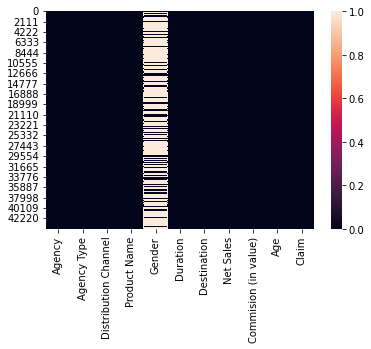

In [ ]:
# plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Dari visualisasi nampak bahwa banyak missing value terdapat pada kolom gender. Kolom gender mengandung data kategorikal F yang berarti Female (Perempuan) dan M yang berarti Male (Laki-Laki). Missing Value dapat diisi dengan modus (most_frequent) dengan menggunakan metoda simple imputer

In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
imputer_most_frequent = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_most_frequent = imputer_most_frequent.fit(df3[['Gender']])
df3['Gender'] = imputer_most_frequent.transform(df3[['Gender']])

Dataset bisa dicek kembali missing value menggunakan visualisasi heatmap

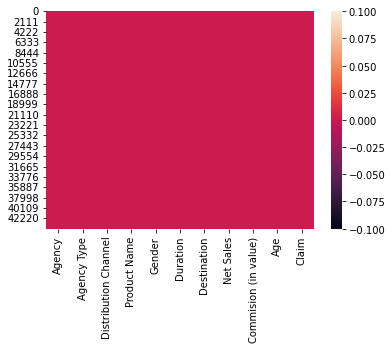

In [ ]:
sns.heatmap(df3.isna())

Pada kolom Duration dan Net Sales mengandung nilai negatif yang kurang tepat untuk menggambarkan Duration dan Net Sales. Sehingga nilai negatif tersebut perlu dirubah menjadi nilai positif.

In [ ]:
df1[df1['Duration'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,NaN,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,NaN,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


Diketahui bahwa nilai duration yang bernilai negatif berjumlah dua. Dapat dirubah menjadi positif dengan menggunakan fungsi absolut (abs).

In [ ]:
df1['Duration'] = abs(df1['Duration'])

In [ ]:
df1[df1['Duration'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Setelah dilakukan absolut dapat dilihat bahwa Duration sudah tidak mengandung nilai negatif

In [ ]:
df1[df1['Net Sales'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,NaN,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,NaN,49,UNITED KINGDOM,-68.00,0.00,36,No


Diketahui bahwa nilai Net Sales yang bernilai negatif ada 483. Dapat dirubah menjadi positif dengan menggunakan fungsi absolut (abs).

In [ ]:
df1['Net Sales'] = abs(df1['Net Sales'])

In [ ]:
df1[df1['Net Sales'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Setelah dilakukan absolut dapat dilihat bahwa Net Sales sudah tidak mengandung nilai negatif

##Feature Engineering

Kolom Destination berisi data kategorikal yang sangat beragam, terdapat 138 unique value. Kolom Destination dapat dirubah dengan mengelompokkan negara berdasarkan benua dengan menggunakan pycountry_convert (referensi : https://pypi.org/project/pycountry/)

Sebelum dilakukan konversi ke benua dapat dilihat bahwa data Destination memiliki 138 nilai destination unique.

In [ ]:
df1['Destination'].nunique()

138

In [ ]:
df1['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [ ]:
def country_to_continent(country_name):
  try:
      country_alpha2 = pc.country_name_to_country_alpha2(country_name.title())
      country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
      country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
      return country_continent_name
  except:
    return 'Other'

In [ ]:
df1['Destination'] = df1['Destination'].apply(country_to_continent)

Setelah dilakukan konversi ke nama benua. Jumlah nilai destination unique menurun drastis menjadi 7 nilai unique saja

In [ ]:
df1['Destination'].nunique()

7

In [ ]:
df1['Destination'].unique()

array(['Asia', 'North America', 'Europe', 'Oceania', 'Other', 'Africa',
       'South America'], dtype=object)

Data Age (Umur) dapat dikelompokkan menjadi beberapa golongan usia dengan menggunakan binning. Data numerikal Age (Umur) dapat dikelompokkan sehingga menjadi data kategorikal Anak, Muda, Pekerja, ParuhBaya, Prapensiun, Pensiun, Lanjut.

Referensi pembagian golongan usia ini adalah BAPPENAS
*   https://sepakat.bappenas.go.id/wiki/Kelompok_Usia



In [ ]:
def make_bins(df):
   label_names = ["Anak", "Muda","Pekerja","ParuhBaya","Prapensiun","Pensiun","Lanjut"]
   cut_points = [  0,  15,  25,  35,  45, 55, 65, 118]
   df["Age"] = pd.cut(df["Age"], cut_points, labels=label_names)
   return df

In [ ]:
df1 = make_bins(df1)

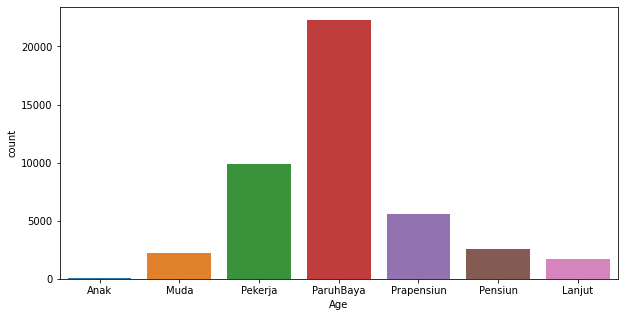

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(df1['Age'])

Dataset dibagi menjadi fitur dan target. Fiturnya menggunakan kolom Agency, Agency Type, Distribution Channel, Product Name,
       Gender, Duration, Destination, Net Sales,
       Commision (in value), Age. Sedangkan untuk Targetnya menggunakan kolom Claim

In [ ]:
X_feature = df1.drop(columns = ['Claim'])
y_feature = np.where(df1['Claim'] == 'Yes', 1, 0)

Data kemudian displit untuk training dan testing dengan porsi 70% data training dan 30% data testing.

In [ ]:
X_train_feature,X_test_feature,y_train_feature,y_test_feature=train_test_split(
    X_feature,
    y_feature,
    stratify=y_feature,
    test_size=0.3,
    random_state=0)

Sebagai pembanding akan dibuat data training dan testing yang tanpa menggunakan feature engineering untuk representasi model awal yang dibuat oleh perusahaan.

In [ ]:
X = df2.drop(columns = ['Claim'])
y = np.where(df2['Claim'] == 'Yes', 1, 0)

Data pembanding juga sama displit untuk training dan testing dengan porsi 70% data training dan 30% data testing.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=0)

Transformer dibuat sebagai preprocessing untuk mengubah data kategorikal menjadi numerikal dengan menggunakan binary encoder sehingga selanjutnya dapat diproses oleh model yang dibuat.

In [ ]:
gender_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one hot encoder', OneHotEncoder(drop='first'))
])

In [ ]:
transformer = ColumnTransformer([
    ('simple imputer', gender_encoder_pipeline, ['Gender']),
    ('binary encoder', ce.BinaryEncoder(),['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Destination','Age'])
], remainder='passthrough')

Data yang sudah ditransform menggunakan transformer kemudian discaling sebelum kemudian diproses oleh model. Pada pemodelan kali ini memakai robust scaler

In [ ]:
scaler = RobustScaler()

Karena jumlah dari kelas Target Claim Yes dan No sangat tidak seimbang maka perlu dilakukan balancing class, pada skenario pemodelan ini akan dicoba dua strategi balancing yaitu SMOTE dan RandomUnderSampler. Skenario bertujuan untuk memilih strategi balancing yang paling tepat untuk kasus pemodelan ini.

In [ ]:
df['Claim'].value_counts()

No     43651
Yes      677
Name: Claim, dtype: int64

In [ ]:
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)

##Modeling and Evaluation

Langkah berikutnya adalah pemodelan. Beberapa klasifier dipilih menjadi kandidat. Kandidat klasifier yang dipilih memiliki karakteristik yang berbeda-beda. Diharap dari beberapa kandidat klasifier ini didapatkan klasifier yang paling cocok untuk kasus ini. Beberapa skenario akan dijalankan untuk evaluasi manakah pemodelan yang paling sesuai untuk kasus ini.

Skenario model benchmark yang dijalankan adalah :


*   Model dibuat tanpa menggunakan feature engineering dan balancing. Model ini adalah model awal yang dibuat oleh perusahaan.
*   Model dibuat dengan menggunakan feature engineering dan balancing SMOTE
*   Model dibuat dengan menggunakan feature engineering dan balancing RandomUnderSampler





In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

Modeling Benchmark K-Fold dengan skenario tanpa Feature Engineering dan Balancing

In [ ]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'recall':rata,'sdev':std}).set_index('model').sort_values(by='recall',ascending=False)

,recall,sdev
model,,
Decision Tree,0.069630,0.023662
Random Forest,0.006361,0.008500
KNN,0.002128,0.004255
Logistic Regression,0.000000,0.000000


In [ ]:
estimator_old=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('model',dt)])

In [ ]:
estimator_old.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simple imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender']),
                                                 ('binary encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                  

In [ ]:
y_pred_old = estimator_old.predict(X_test)

Modeling Benchmark K-Fold dengan skenario menggunakan Feature Engineering dan Balancing SMOTE

In [ ]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('imbalance', smote),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train_feature,y_train_feature,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'recall':rata,'sdev':std}).set_index('model').sort_values(by='recall',ascending=False)

,recall,sdev
model,,
Logistic Regression,0.698387,0.030992
KNN,0.265868,0.051115
Decision Tree,0.109608,0.042795
Random Forest,0.096999,0.021302


Modeling Benchmark K-Fold dengan skenario menggunakan Feature Engineering dan Balancing RandomUnderSampler

In [ ]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('imbalance', rus),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train_feature,y_train_feature,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'recall':rata,'sdev':std}).set_index('model').sort_values(by='recall',ascending=False)

,recall,sdev
model,,
KNN,0.725845,0.040987
Logistic Regression,0.717380,0.042884
Random Forest,0.708981,0.067339
Decision Tree,0.656013,0.047260


Dari skenario yang dijalankan didapatkan hasil bahwa skenario menggunakan Feature Engineering dan Balancing RandomUnderSampler mencapai hasil recall yang paling tinggi.

Kemudian skenario menggunakan Feature Engineering dan Balancing RandomUnderSampler dijalankan kembali dengan model benchmark test data untuk mengetahui model mana yang recallnya paling tinggi.

Modeling Benchmark Test Data dengan skenario menggunakan Feature Engineering dan Balancing RandomUnderSampler

In [ ]:
models = [logreg,knn,dt,rf]
score_recall = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('imbalance', rus),
        ('model',i)])
    X_train_feature,X_test_feature
    
    estimator.fit(X_train_feature,y_train_feature)
    return(estimator,estimator.predict(X_test_feature),X_test_feature)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']):
    estimator,y_pred,X_test_feature = y_pred_func(i)
    y_predict = estimator.predict(X_test_feature)
    score_recall.append(recall_score(y_test_feature,y_predict))
    print(j,'\n', classification_report(y_test_feature,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
             'recall score':score_recall}).set_index('model').sort_values(by='recall score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.99      0.83      0.91     13096
           1       0.05      0.62      0.10       203

    accuracy                           0.83     13299
   macro avg       0.52      0.73      0.50     13299
weighted avg       0.98      0.83      0.89     13299

KNN 
               precision    recall  f1-score   support

           0       0.99      0.74      0.85     13096
           1       0.04      0.73      0.08       203

    accuracy                           0.74     13299
   macro avg       0.52      0.74      0.47     13299
weighted avg       0.98      0.74      0.84     13299

Decision Tree 
               precision    recall  f1-score   support

           0       0.99      0.68      0.81     13096
           1       0.03      0.61      0.05       203

    accuracy                           0.68     13299
   macro avg       0.51      0.64      0.43     13299
weighted avg       0.98      0

,recall score
model,
KNN,0.729064
Random Forest,0.679803
Logistic Regression,0.620690
Decision Tree,0.605911


Dari skenario yang telah dijalankan didapatkan hasil bahwa model KNN adalah yang paling tinggi nilai recallnya. Sehingga KNN menggunakan Feature Engineering dan Balancing RandomUnderSampler dipilih sebagai model untuk kasus ini.

##Hyperparameter Tuning

Hyperparameter Tuning dilakukan untuk mencari parameter model terbaik. Diharapkan dengan menggunakan paramater terbaik dapat mencapai nilai recall yang paling tinggi. Pada kasus ini digunakan RandomizedSearchCV untuk mencari parameter model yang terbaik.

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

estimator_knn = Pipeline([
        ('preprocess',transformer),
        ('scaler', scaler),
        ('imbalance', rus),
        ('model',knn)])

hyperparam_space = {
    'model__leaf_size':list(range(1,50,1)),
    'model__n_neighbors':list(range(1,50,1)),
    'model__p':[1,2]
}

skfold = StratifiedKFold(n_splits = 5)

In [ ]:
randomized_search = RandomizedSearchCV(
    estimator_knn, 
    param_distributions = hyperparam_space, 
    n_iter = 25,
    cv = 5, 
    scoring = 'recall', 
    random_state = 0,
    n_jobs = -1
)

In [ ]:
randomized_search.fit(X_train_feature, y_train_feature)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('simple '
                                                                               'imputer',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one '
                                                                                                'hot '
                                                                                                'encoder',
                                                                                         

Didapatkan paramater yang terbaik adalah 'model__p': 2, 'model__n_neighbors': 9, 'model__leaf_size': 39. Parameter yang didapat diapply ke model yang sudah dibuat.

In [ ]:
print('best param',randomized_search.best_params_)

best param {'model__p': 2, 'model__n_neighbors': 9, 'model__leaf_size': 39}


In [ ]:
estimator_knn.fit(X_train_feature, y_train_feature)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simple imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender']),
                                                 ('binary encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                  

In [ ]:
y_knn = estimator_knn.predict(X_test_feature)

In [ ]:
model_new = randomized_search.best_estimator_
model_new.fit(X_train_feature,y_train_feature)
y_tuning = model_new.predict(X_test_feature)

Sebelum menggunakan hyperparameter tuning

In [ ]:
print(recall_score(y_test_feature,y_knn))

0.729064039408867


Sesudah menggunakan hyperparameter tuning

In [ ]:
print(recall_score(y_test_feature,y_tuning))

0.7241379310344828


Dari perbandingan nilai recall sebelum dan sesudah hyperparameter tuning. Dapat dilihat bahwa nilai recall sebelum tuning adalah yang terbaik. Sehingga untuk model yang baru kita dapat menggunakan model yang tidak menggunakan hyperparameter tuning

##Conclusion

Berdasarkan hasil confusion matrix dapat ditarik kesimpulan bahwa model baru yang dibuat dapat mengungguli model yang lama dalam nilai recall. Model dapat melakukan seleksi terhadap 73% customer yang mendapatkan klaim asuransi. Hal ini tentunya lebih baik daripada model lama yang hanya dapat melakukan seleksi terhadap 10% customer yang mendapatkan klaim asuransi saja.

Customer yang mendapatkan klaim asuransi dengan baik akan puas dan biasanya tertarik untuk membeli asuransi travel lagi. Dengan model yang baru jumlah customer yang mendapatkan klaim dapat diseleksi dengan lebih baik daripada model lama dengan jumlah customer yang berhasil diseleksi sebanyak 148 orang (Jumlah True Positive Model Baru).Sedangkan untuk model lama jumlah customer yang mendapatkan klaim hanya sebanyak 22 orang (Jumlah True Positive Model Lama)

Sehingga apabila net sales asuransi travel rata-rata tiap customer adalah 41.85 USD maka potensi pendapatan yang didapat perusahaan adalah 22 x 41.85 = 920.7 USD jika perusahaan menggunakan model yang lama.

Apabila perusahaan menggunakan model yang baru maka potensi pendapatan yang didapat perusahaan adalah 148 x 41.85 = 6,193.8 USD

Sehingga dapat ditarik kesimpulan bahwa dengan menggunakan model yang baru, perusahaan akan berpotensi untuk mendapatkan pendapatan yang jauh lebih banyak dibandingkan dengan menggunakan model yang lama.

In [ ]:
df1['Net Sales'].mean()

41.85963837754918

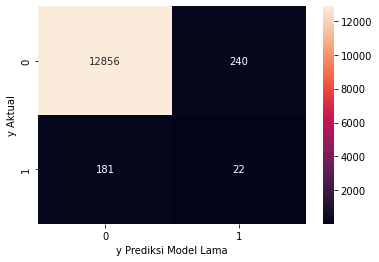

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_old), annot=True, fmt='.0f')
plt.xlabel('y Prediksi Model Lama');
plt.ylabel('y Aktual');

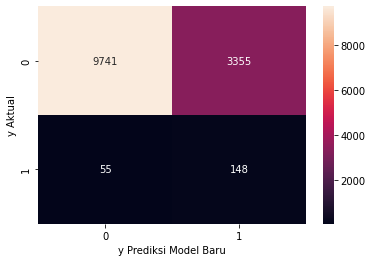

In [ ]:
sns.heatmap(confusion_matrix(y_test_feature, y_knn), annot=True, fmt='.0f')
plt.xlabel('y Prediksi Model Baru');
plt.ylabel('y Aktual');

##Recommendation

Hal-hal yang disarankan agar mengembangkan modelnya lebih baik lagi :


*   Memakai GridSearchCV untuk Hyperparameter Tuningnya untuk nilai recall yang lebih baik. Namun kemungkinan waktu fitting akan menjadi lebih lama jika menggunakan GridSearchCV
*   Kombinasi antara balancing RandomOverSample dan RandomUnderSample kemungkinan dapat meningkatkan nilai recall model.
*   Walaupun model baru berhasil memperkecil nilai False Negative namun konsekuensinya nilai False Positive menjadi membesar. Sehingga perlu dilakukan pengecekan berulang terhadap customer yang seharusnya tidak mendapatkan klaim asuransi. Supaya klaim asuransi yang tidak tepat sasaran tidak bertambah banyak jumlahnya
*   Mencoba lebih banyak variasi algoritma klasifier. Terutama klasifier yang memiliki parameter class_weight. 





In [ ]:
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(estimator_knn, open(filename, 'wb'))

In [ ]:
# # Load the model
# filename = 'finalized_model.sav'
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.predict(X_test_feature)
# print(classification_report(y_test_feature,result))